# Question

What are the most important economic factors for determining the quality of life of the peaple of a country?

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
response = requests.get("https://take-profit.org/en/statistics/quality-of-life/")

In [3]:
response.status_code

200

In [4]:
soup = bs(response.content,'html.parser')

In [5]:
ls = soup.find_all('a',class_='underline')

In [6]:
places = []

In [7]:
for element in ls:
  places.append(element.string)

In [8]:
print(places)

['Denmark', 'Finland', 'Netherlands', 'Switzerland', 'Austria', 'Germany', 'Australia', 'New Zealand', 'United States', 'Sweden', 'Estonia', 'Norway', 'Japan', 'Slovenia', 'Spain', 'Canada', 'United Kingdom', 'Portugal', 'France', 'Belgium', 'United Arab Emirates', 'Ireland', 'Taiwan', 'Croatia', 'Czech Republic', 'Qatar', 'South Korea', 'Slovakia', 'Israel', 'Singapore', 'Saudi Arabia', 'Lithuania', 'Poland', 'Italy', 'Romania', 'South Africa', 'Greece', 'Hungary', 'Argentina', 'Bulgaria', 'Turkey', 'Mexico', 'Serbia', 'Chile', 'India', 'Indonesia', 'Colombia', 'Hong Kong', 'Russia', 'Thailand', 'Pakistan', 'Brazil', 'China', 'Philippines', 'Ukraine', 'Iran', 'Egypt', 'Vietnam', 'Malaysia']


In [9]:
# I will ultimately used the links list when going through all the webpages specific to various countries and extracting information from them
links =[]
lz = soup.find_all('a')
#lz = soup.find('a')
for element in lz:
  new_string = str(element.get('href'))
  if 'https://take-profit.org/en/statistics/countries/' in new_string:
    links.append(new_string)


In [10]:
links

['https://take-profit.org/en/statistics/countries/united-states/',
 'https://take-profit.org/en/statistics/countries/united-kingdom/',
 'https://take-profit.org/en/statistics/countries/germany/',
 'https://take-profit.org/en/statistics/countries/japan/',
 'https://take-profit.org/en/statistics/countries/canada/',
 'https://take-profit.org/en/statistics/countries/australia/',
 'https://take-profit.org/en/statistics/countries/china/',
 'https://take-profit.org/en/statistics/countries/denmark/',
 'https://take-profit.org/en/statistics/countries/finland/',
 'https://take-profit.org/en/statistics/countries/netherlands/',
 'https://take-profit.org/en/statistics/countries/switzerland/',
 'https://take-profit.org/en/statistics/countries/austria/',
 'https://take-profit.org/en/statistics/countries/germany/',
 'https://take-profit.org/en/statistics/countries/australia/',
 'https://take-profit.org/en/statistics/countries/new-zealand/',
 'https://take-profit.org/en/statistics/countries/united-stat

In [11]:
ratings = []
li = soup.find_all('span',class_='value')
for element in li:
  ratings.append(element.string)
print(ratings)

['197.75', '195.30', '191.25', '190.81', '190.22', '190.04', '188.70', '182.40', '180.56', '176.81', '176.44', '176.27', '176.04', '175.36', '174.92', '173.90', '171.89', '166.71', '166.22', '164.00', '163.54', '163.53', '163.28', '162.36', '162.01', '159.62', '155.38', '155.37', '152.25', '150.45', '149.58', '148.98', '146.58', '146.13', '144.05', '137.89', '137.43', '132.31', '131.85', '129.69', '127.64', '126.42', '123.48', '122.73', '122.09', '112.89', '112.15', '110.28', '103.32', '101.18', '100.35', '100.13', '99.43', '99.11', '95.96', '92.43', '84.42', '81.09', '0.00']


In [12]:
# The reason why I am creating a dictionary here is because I want to utilize these ratings in the future.
# Specifically, I want to create lists that contain information on other economic indicators where each list is specific to information on a certain country.
# Once I create these lists, I want to add the rating values to the end of the lists. 
dictionary = {}
for i in range(len(places)):
  dictionary[places[i]] = ratings[i]
print(dictionary)


{'Denmark': '197.75', 'Finland': '195.30', 'Netherlands': '191.25', 'Switzerland': '190.81', 'Austria': '190.22', 'Germany': '190.04', 'Australia': '188.70', 'New Zealand': '182.40', 'United States': '180.56', 'Sweden': '176.81', 'Estonia': '176.44', 'Norway': '176.27', 'Japan': '176.04', 'Slovenia': '175.36', 'Spain': '174.92', 'Canada': '173.90', 'United Kingdom': '171.89', 'Portugal': '166.71', 'France': '166.22', 'Belgium': '164.00', 'United Arab Emirates': '163.54', 'Ireland': '163.53', 'Taiwan': '163.28', 'Croatia': '162.36', 'Czech Republic': '162.01', 'Qatar': '159.62', 'South Korea': '155.38', 'Slovakia': '155.37', 'Israel': '152.25', 'Singapore': '150.45', 'Saudi Arabia': '149.58', 'Lithuania': '148.98', 'Poland': '146.58', 'Italy': '146.13', 'Romania': '144.05', 'South Africa': '137.89', 'Greece': '137.43', 'Hungary': '132.31', 'Argentina': '131.85', 'Bulgaria': '129.69', 'Turkey': '127.64', 'Mexico': '126.42', 'Serbia': '123.48', 'Chile': '122.73', 'India': '122.09', 'Indon

In [13]:
# By executing the following block of code below, I am able to create a list of various lists containing information about countries. Each list contains values of economic indicators 
# each list has information on a country, the rank of the country, the quality of life in that country, the corruption_rank of that country, the ease of doing buisness in that
# country,the gdp value of the country, gdp annual growth in that country expressed as a percentage , the gdp growth rate of that country expressed as a percentage,
# the gdp per capita in usd of that country,the inflation rate of that country expressed as percentage, the interest rate of that country expressed as a percentage,
# the unemployment rate of that country expressed as a percentage, the government debt tp gdp of that country expressed as a percentage,
# the consumer price index of that country in index points, and finally the current account to gdp of that country expressed as a percentage.
# There are 66 webpages, one unique to each country and I essentially go through the webpage which contains detailed information on the economic indicators of a country
# and apply webscraping methods to extract the data.
# On each webpage, there are tables that countain information on the major economic indicators, budget indicators, inflation indicators and trade indicators

countries = []
for element in links:
  res = requests.get(element)
  soup = bs(res.content,'html.parser')
  country = []
  country.append(soup.find('div',class_='country-name').string)
  for row in soup.table.find_all('tr'):
    country.append(row.find(class_='rate-num').string)
  some_list = list(soup.find_all('div',class_="bussiness-table"))


  all_tags = list(some_list[0].table.find_all('tr'))
  country.append((some_list[0].table.find("td", text="GDP Value").find_next("td")).find(class_='bold-val').string)
  country.append((some_list[0].table.find("td", text="GDP Annual Growth Rate").find_next("td")).find(class_='bold-val').string)
  if some_list[0].table.find("td", text="GDP Growth Rate") != None:
    country.append((some_list[0].table.find("td", text="GDP Growth Rate").find_next("td")).find(class_='bold-val').string)
  else: 
    country.append('')

  if some_list[0].table.find("td", text="GDP per capita") != None:
    country.append((some_list[0].table.find("td", text="GDP per capita").find_next("td")).find(class_='bold-val').string)
  else:
    if country[0] == 'Taiwan': 
      country.append('33059')
    else:
      country.append('')
  
  country.append((some_list[0].table.find("td", text="Inflation Rate YoY").find_next("td")).find(class_='bold-val').string)
  country.append((some_list[0].table.find("td", text="Interest Rate").find_next("td")).find(class_='bold-val').string)
  country.append((some_list[0].table.find("td", text="Unemployment Rate").find_next("td")).find(class_='bold-val').string)


  all_tags = list(some_list[2].table.find_all('tr'))
  for i in range(1,2):
    country.append(all_tags[i].find(class_='bold-val').string)

  all_tags = list(some_list[3].table.find_all('tr'))
  for i in range(1,2):
    country.append(all_tags[i].find(class_='bold-val').string)


  all_tags = list(some_list[7].table.find_all('tr'))
 
  if len(all_tags) > 2:
    for i in range(2,3):
      country.append(all_tags[i].find(class_='bold-val').string)
  else:
    country.append('')

  countries.append(country)
for element in countries:
  element.append(dictionary[element[0]])
  print(element)
  






['United States', '#13', '#9', '#22', '#8', '22996', '1.9', '2.9', '61280', '7.7', '4', '3.7', '137', '298', '37', '180.56']
['United Kingdom', '#17', '#17', '#11', '#9', '3187', '1.3', '-0.2', '46209', '1.7', '3', '3.9', '97.4', '108.5', '45', '171.89']
['Germany', '#4', '#6', '#12', '#24', '4223', '1.3', '0.4', '42527', '10', '2', '5.6', '69.3', '122', '45', '190.04']
['Japan', '#34', '#13', '#19', '#39', '4937', '1.5', '-0.2', '35278', '3.7', '-0.1', '2.6', '262', '104', '55.97', '176.04']
['Canada', '#8', '#16', '#10', '#22', '1991', '3.9', '0.7', '43946', '6.9', '4.25', '5.1', '113', '154', '33', '173.90']
['Australia', '#12', '#7', '#13', '#18', '1543', '5.9', '0.6', '58780', '7.3', '3.1', '3.4', '40.7', '128', '45', '188.70']
['China', '#31', '#55', '#78', '#46', '17734', '3.9', '3.9', '11188', '1.6', '3.65', '5.5', '71.5', '103', '45', '99.43']
['Denmark', '#1', '#1', '#1', '#3', '397', '3.4', '0.5', '58586', '10.1', '1.25', '2.2', '36.7', '118', '56', '197.75']
['Finland', '#1

In [14]:

# each list contains information pertaining to the name of it for all 66 countries. The values of each list will ultimately become a column of values in a dataframe. 
Country_Name = []
Country_Rank = []
quality_of_life = []
Corruption_Rank = []
Ease_of_Buisness = []
GDP_Value = []
gdp_annual_growth = []
gdp_growth_rate = []
GDP_Per_Capita = []
Inflation_Rate = []
Interest_Rate = []
Unemploy_Rate = []
Govt_Debt_GDP = []
CPI_Index = []
Income_Tax = []
rating = []
for element in countries:
  Country_Name.append(element[0])
  Country_Rank.append(element[1])
  quality_of_life.append(element[2])
  Corruption_Rank.append(element[3])
  Ease_of_Buisness.append(element[4])
  GDP_Value.append(element[5])
  gdp_annual_growth.append(element[6])
  gdp_growth_rate.append(element[7])
  GDP_Per_Capita.append(element[8])
  Inflation_Rate.append(element[9])
  Interest_Rate.append(element[10])
  Unemploy_Rate.append(element[11])
  Govt_Debt_GDP.append(element[12])
  CPI_Index.append(element[13])
  Income_Tax.append(element[14])
  rating.append(element[15])
print(Country_Name)
print(Country_Rank)
print(quality_of_life)
print(Corruption_Rank)
print(Ease_of_Buisness)
print(GDP_Value)
print(gdp_annual_growth)
print(gdp_growth_rate)
print(GDP_Per_Capita)
print(Inflation_Rate)
print(Interest_Rate)
print(Unemploy_Rate)
print(Govt_Debt_GDP)
print(CPI_Index)
print(Income_Tax)
print(rating)


['United States', 'United Kingdom', 'Germany', 'Japan', 'Canada', 'Australia', 'China', 'Denmark', 'Finland', 'Netherlands', 'Switzerland', 'Austria', 'Germany', 'Australia', 'New Zealand', 'United States', 'Sweden', 'Estonia', 'Norway', 'Japan', 'Slovenia', 'Spain', 'Canada', 'United Kingdom', 'Portugal', 'France', 'Belgium', 'United Arab Emirates', 'Ireland', 'Taiwan', 'Croatia', 'Czech Republic', 'Qatar', 'South Korea', 'Slovakia', 'Israel', 'Singapore', 'Saudi Arabia', 'Lithuania', 'Poland', 'Italy', 'Romania', 'South Africa', 'Greece', 'Hungary', 'Argentina', 'Bulgaria', 'Turkey', 'Mexico', 'Serbia', 'Chile', 'India', 'Indonesia', 'Colombia', 'Hong Kong', 'Russia', 'Thailand', 'Pakistan', 'Brazil', 'China', 'Philippines', 'Ukraine', 'Iran', 'Egypt', 'Vietnam', 'Malaysia']
['#13', '#17', '#4', '#34', '#8', '#12', '#31', '#1', '#14', '#3', '#6', '#15', '#4', '#12', '#20', '#13', '#7', '#28', '#9', '#34', '#45', '#43', '#8', '#17', '#69', '#19', '#23', '#18', '#37', '#27', '#66', '#2

In [15]:
# Here I am trying to create a dataframe where each array that I defined above corresponds to values of a certain column 
data  = {
'Country_Name':Country_Name,
'Country_Rank' : Country_Rank,
'quality_of_life' : quality_of_life,
'Corruption_Rank' : Corruption_Rank,
'Ease_of_Buisness': Ease_of_Buisness,
'GDP_Value' : GDP_Value,
'gdp growth%': gdp_annual_growth,
'gdp growth rate%' : gdp_growth_rate,
'GDP_Per_Capita' : GDP_Per_Capita,
'Inflation_Rate' : Inflation_Rate,
'Interest_Rate' : Interest_Rate,
'Unemploy_Rate' : Unemploy_Rate,
'Govt_Debt_GDP': Govt_Debt_GDP,
'CPI_Index' : CPI_Index,
'Income_Tax' : Income_Tax,
'rating' : rating
}


In [16]:
world_life_quality_df = pd.DataFrame(data=data)
world_life_quality_df.head(100)
# when head() is called on a data frame object,the values for different rows of the data frame will be displayed
# The number of rows that are displayed depends on the number that is passed into the head
# Because 100 was passed in and there are only 66 countries, all the rows of the dataframe object are displayed 

,Country_Name,Country_Rank,quality_of_life,Corruption_Rank,Ease_of_Buisness,GDP_Value,gdp growth%,gdp growth rate%,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,rating
0,United States,#13,#9,#22,#8,22996,1.9,2.9,61280,7.7,4,3.7,137,298,37,180.56
1,United Kingdom,#17,#17,#11,#9,3187,1.3,-0.2,46209,1.7,3,3.9,97.4,108.5,45,171.89
2,Germany,#4,#6,#12,#24,4223,1.3,0.4,42527,10,2,5.6,69.3,122,45,190.04
3,Japan,#34,#13,#19,#39,4937,1.5,-0.2,35278,3.7,-0.1,2.6,262,104,55.97,176.04
4,Canada,#8,#16,#10,#22,1991,3.9,0.7,43946,6.9,4.25,5.1,113,154,33,173.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ukraine,#105,#58,#109,#70,200,-30.8,9,2452,26.5,25,10.6,48.9,410,18,95.96
62,Iran,#,#59,#127,#116,232,-5.7,,5333,52.2,18,9.2,41.5,514,,92.43
63,Egypt,#96,#60,#98,#109,404,5.4,,4086,18.7,13.25,7.4,87.2,139,25,84.42
64,Vietnam,#94,#61,#107,#68,363,13.67,6.88,3373,4.37,6,2.28,39.6,110,35,81.09


In [17]:
world_life_quality_df.to_csv("countries_quality_life_data_dataset_not_cleaned.csv")

In [18]:
world_life_quality_df = pd.read_csv(r'countries_quality_life_data_dataset_not_cleaned.csv')

# Data Cleanup

In [19]:
# Here I am trying to figure out the types of values that are stored in each of the columns of the dataframe 
world_life_quality_df.dtypes

Unnamed: 0            int64
Country_Name         object
Country_Rank         object
quality_of_life      object
Corruption_Rank      object
Ease_of_Buisness     object
GDP_Value           float64
gdp growth%         float64
gdp growth rate%    float64
GDP_Per_Capita        int64
Inflation_Rate      float64
Interest_Rate       float64
Unemploy_Rate       float64
Govt_Debt_GDP       float64
CPI_Index           float64
Income_Tax          float64
rating              float64
dtype: object

In [20]:
# Here I am trying to determnine the number of null values present in each of the columns of the dataframe 
world_life_quality_df.isnull().sum()

Unnamed: 0          0
Country_Name        0
Country_Rank        0
quality_of_life     0
Corruption_Rank     0
Ease_of_Buisness    0
GDP_Value           0
gdp growth%         0
gdp growth rate%    4
GDP_Per_Capita      0
Inflation_Rate      0
Interest_Rate       0
Unemploy_Rate       0
Govt_Debt_GDP       0
CPI_Index           0
Income_Tax          1
rating              0
dtype: int64

In [21]:
world_life_quality_df.head()

,Unnamed: 0,Country_Name,Country_Rank,quality_of_life,Corruption_Rank,Ease_of_Buisness,GDP_Value,gdp growth%,gdp growth rate%,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,rating
0,0,United States,#13,#9,#22,#8,22996.0,1.9,2.9,61280,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,1,United Kingdom,#17,#17,#11,#9,3187.0,1.3,-0.2,46209,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,2,Germany,#4,#6,#12,#24,4223.0,1.3,0.4,42527,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,3,Japan,#34,#13,#19,#39,4937.0,1.5,-0.2,35278,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,4,Canada,#8,#16,#10,#22,1991.0,3.9,0.7,43946,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [22]:
world_life_quality_df = world_life_quality_df.drop("gdp growth%", axis='columns')

In [23]:
world_life_quality_df = world_life_quality_df.drop("gdp growth rate%", axis='columns')

In [24]:
# The data in the gdp growth% and gdp growth rate % columns do not contain data for all the countries and cannot be infered or derived. As the result of the 2 drop functions called on the dataframe, the data frame no longer contains columns called "gdp growth%"
# and "gdp growth rate %"
world_life_quality_df.isnull().sum()

Unnamed: 0          0
Country_Name        0
Country_Rank        0
quality_of_life     0
Corruption_Rank     0
Ease_of_Buisness    0
GDP_Value           0
GDP_Per_Capita      0
Inflation_Rate      0
Interest_Rate       0
Unemploy_Rate       0
Govt_Debt_GDP       0
CPI_Index           0
Income_Tax          1
rating              0
dtype: int64

In [25]:
world_life_quality_df = world_life_quality_df.fillna(0)

In [26]:
# Adter cleaning the data, there are no more null values in each of the columns
world_life_quality_df.isnull().sum()

Unnamed: 0          0
Country_Name        0
Country_Rank        0
quality_of_life     0
Corruption_Rank     0
Ease_of_Buisness    0
GDP_Value           0
GDP_Per_Capita      0
Inflation_Rate      0
Interest_Rate       0
Unemploy_Rate       0
Govt_Debt_GDP       0
CPI_Index           0
Income_Tax          0
rating              0
dtype: int64

In [27]:
def reformat(string):
    try:
        remove_characters = "#"
        for character in remove_characters:
            string = string.replace(character, "")
        return string
    except:
        return string

In [28]:
# As a result of the code below being executed, the values of all of the colunmns of the data frame have been analyzed and
# if there happened to be a value in a column that had '#' in it, then it would be removed
# The end result would be a data frame in which there would be zero values with '#' next to them 
for col in world_life_quality_df.columns:
    world_life_quality_df[col] = world_life_quality_df[col].apply(reformat)

In [29]:
world_life_quality_df.head()

,Unnamed: 0,Country_Name,Country_Rank,quality_of_life,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,rating
0,0,United States,13,9,22,8,22996.0,61280,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,1,United Kingdom,17,17,11,9,3187.0,46209,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,2,Germany,4,6,12,24,4223.0,42527,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,3,Japan,34,13,19,39,4937.0,35278,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,4,Canada,8,16,10,22,1991.0,43946,6.9,4.25,5.1,113.0,154.0,33.00,173.90


# Data Visulization

In [30]:
# Here I am changing the name of the column called Country_Rank. The new name for this column is Credit_Rank
world_life_quality_df.rename(columns = {'Country_Rank':'Credit_Rank'}, inplace = True)

In [31]:
world_life_quality_df.head()

,Unnamed: 0,Country_Name,Credit_Rank,quality_of_life,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,rating
0,0,United States,13,9,22,8,22996.0,61280,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,1,United Kingdom,17,17,11,9,3187.0,46209,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,2,Germany,4,6,12,24,4223.0,42527,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,3,Japan,34,13,19,39,4937.0,35278,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,4,Canada,8,16,10,22,1991.0,43946,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [32]:
for col in world_life_quality_df.columns.difference(['Country_Name', 'Credit_Rank', 'quality_of_life', 'Corruption_Rank', 'Ease_of_Buisness']):
    world_life_quality_df[col] = world_life_quality_df[col].astype('float64')

In [33]:
world_life_quality_df.dtypes

Unnamed: 0          float64
Country_Name         object
Credit_Rank          object
quality_of_life      object
Corruption_Rank      object
Ease_of_Buisness     object
GDP_Value           float64
GDP_Per_Capita      float64
Inflation_Rate      float64
Interest_Rate       float64
Unemploy_Rate       float64
Govt_Debt_GDP       float64
CPI_Index           float64
Income_Tax          float64
rating              float64
dtype: object

In [34]:
world_life_quality_df["Credit_Rank"] = world_life_quality_df["Credit_Rank"].apply(pd.to_numeric)

In [35]:
# the astype() is called on a column of dataframe object(series) and takes in a value that represents a certain data type
# the values in the series as a result will be of the datatype that is equivalent to that passed into the astype() as an argument
world_life_quality_df["quality_of_life"] = world_life_quality_df["quality_of_life"].astype('float64')

In [36]:
world_life_quality_df["Corruption_Rank"] = world_life_quality_df["Corruption_Rank"].astype('float64')


In [37]:
world_life_quality_df["Ease_of_Buisness"] = world_life_quality_df["Ease_of_Buisness"].astype('float64')

In [38]:
# The next 3 lines of code have to do with changing the name of some of the columns in the dataframe 
world_life_quality_df.rename(columns = {'quality_of_life':'quality_of_life_rank'}, inplace = True)
world_life_quality_df.rename(columns = {'Ease_of_Buisness':'Ease_of_Buisness'}, inplace = True)

In [39]:
world_life_quality_df.rename(columns = {'rating':'Quality_of_Life_Rating'}, inplace = True)

In [40]:
world_life_quality_df.dtypes

Unnamed: 0                float64
Country_Name               object
Credit_Rank               float64
quality_of_life_rank      float64
Corruption_Rank           float64
Ease_of_Buisness          float64
GDP_Value                 float64
GDP_Per_Capita            float64
Inflation_Rate            float64
Interest_Rate             float64
Unemploy_Rate             float64
Govt_Debt_GDP             float64
CPI_Index                 float64
Income_Tax                float64
Quality_of_Life_Rating    float64
dtype: object

In [41]:
world_life_quality_df["Country_Name"] = world_life_quality_df["Country_Name"].astype('string')

In [42]:
world_life_quality_df.isnull().sum()

Unnamed: 0                0
Country_Name              0
Credit_Rank               1
quality_of_life_rank      0
Corruption_Rank           0
Ease_of_Buisness          0
GDP_Value                 0
GDP_Per_Capita            0
Inflation_Rate            0
Interest_Rate             0
Unemploy_Rate             0
Govt_Debt_GDP             0
CPI_Index                 0
Income_Tax                0
Quality_of_Life_Rating    0
dtype: int64

In [43]:
world_life_quality_df.tail()


,Unnamed: 0,Country_Name,Credit_Rank,quality_of_life_rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
61,61.0,Ukraine,105.0,58.0,109.0,70.0,200.0,2452.0,26.50,25.00,10.60,48.9,410.0,18.0,95.96
62,62.0,Iran,NaN,59.0,127.0,116.0,232.0,5333.0,52.20,18.00,9.20,41.5,514.0,0.0,92.43
63,63.0,Egypt,96.0,60.0,98.0,109.0,404.0,4086.0,18.70,13.25,7.40,87.2,139.0,25.0,84.42
64,64.0,Vietnam,94.0,61.0,107.0,68.0,363.0,3373.0,4.37,6.00,2.28,39.6,110.0,35.0,81.09
65,65.0,Malaysia,41.0,62.0,56.0,15.0,373.0,10827.0,4.00,2.75,3.60,63.3,129.0,30.0,0.00


In [44]:
indexMalaysia = world_life_quality_df[ (world_life_quality_df['Country_Name'] == 'Malaysia')].index
world_life_quality_df.drop(indexMalaysia, inplace=True)

In [45]:
indexIran = world_life_quality_df[ (world_life_quality_df['Country_Name'] == 'Iran')].index
world_life_quality_df.drop(indexIran, inplace=True)

In [46]:
world_life_quality_df.isnull().sum()

Unnamed: 0                0
Country_Name              0
Credit_Rank               0
quality_of_life_rank      0
Corruption_Rank           0
Ease_of_Buisness          0
GDP_Value                 0
GDP_Per_Capita            0
Inflation_Rate            0
Interest_Rate             0
Unemploy_Rate             0
Govt_Debt_GDP             0
CPI_Index                 0
Income_Tax                0
Quality_of_Life_Rating    0
dtype: int64

In [47]:
world_life_quality_df.to_csv("countries_quality_life_data_dataset_cleaned.csv")

In [48]:
world_life_quality_df = pd.read_csv(r'countries_quality_life_data_dataset_cleaned.csv')

In [49]:
world_life_quality_df["Country_Name"] = world_life_quality_df["Country_Name"].astype('string')

In [50]:
world_life_quality_df.describe()

,Unnamed: 0.1,Unnamed: 0,Credit_Rank,quality_of_life_rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,31.531250,31.531250,39.375000,28.703125,43.812500,41.515625,2286.319844,30230.250000,11.869219,5.800313,5.724687,75.781875,452.031250,35.356719,150.017188
std,18.672592,18.672592,29.095082,17.869616,35.082612,30.131981,4903.968864,22320.280602,14.645630,9.806671,4.259943,49.497288,1355.183754,14.486331,32.189833
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,36.260000,1507.000000,1.600000,-0.100000,0.100000,18.100000,101.000000,0.000000,81.090000
25%,15.750000,15.750000,15.750000,13.000000,13.750000,17.750000,310.250000,11188.000000,5.997500,2.000000,3.630000,41.775000,108.875000,26.875000,125.685000
50%,31.500000,31.500000,32.000000,26.500000,33.500000,37.000000,502.500000,25471.500000,7.900000,3.250000,5.200000,63.800000,121.500000,39.000000,157.500000
75%,47.250000,47.250000,59.250000,44.250000,70.500000,56.500000,1781.750000,44674.750000,12.697500,6.062500,6.600000,87.715000,181.750000,45.000000,176.040000
max,64.000000,64.000000,106.000000,61.000000,128.000000,121.000000,22996.000000,88588.000000,88.000000,75.000000,32.900000,262.000000,8885.000000,56.950000,197.750000


In [51]:
world_life_quality_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [52]:
world_life_quality_df.head()

,Unnamed: 0.1,Country_Name,Credit_Rank,quality_of_life_rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
0,0,United States,13.0,9.0,22.0,8.0,22996.0,61280.0,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,1,United Kingdom,17.0,17.0,11.0,9.0,3187.0,46209.0,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,2,Germany,4.0,6.0,12.0,24.0,4223.0,42527.0,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,3,Japan,34.0,13.0,19.0,39.0,4937.0,35278.0,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,4,Canada,8.0,16.0,10.0,22.0,1991.0,43946.0,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [53]:
world_life_quality_df.drop(['Unnamed: 0.1'], axis = 1, inplace=True)

<AxesSubplot:>

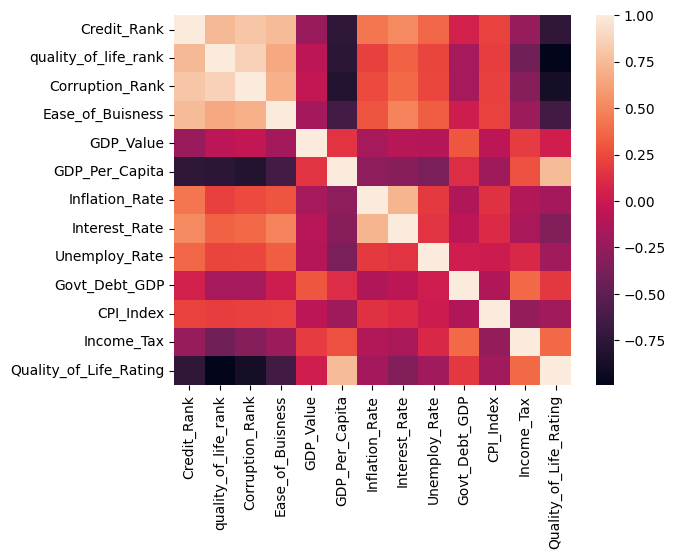

In [54]:
sns.heatmap(world_life_quality_df.corr())
# There is a negative correlation between the Quality_of_Life_Rating of a country and the quality_of_life_rank of a country 
# This makes sense because countries whose quality_of_life_rank values are within 1 - 10 have high Quality_of_Life_Rating
# values which are represented in terms of the number of points
# The higher the Quality_of_Life_Rating, the lower the quality_of_life_rank

#There is also a strong negative correlation between Corruption_Rank of a country and GDP_Per_Capita of a country
# The higher the GDP_Per_Capita, the lower the corruption rank
# The lower the corruption rank, the better

# There is a strong positive correlation between the Corruption_Rank of a country and the quality_of_life_rank of a country
# What this means is the lower the Corruption_Rank, the lower the quality_of_life_rank


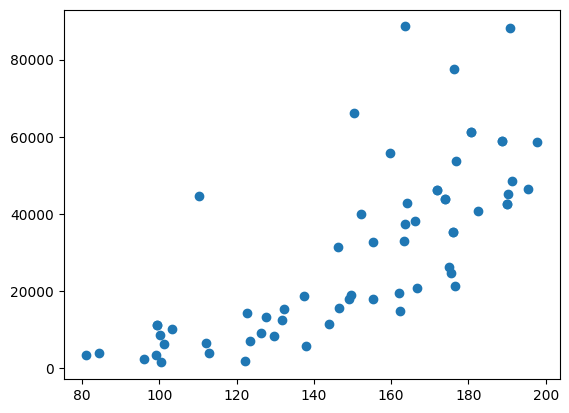

In [55]:
plt.scatter(world_life_quality_df['Quality_of_Life_Rating'], world_life_quality_df['GDP_Per_Capita'])
# There is a positive correlation between Quality_of_Life_Rating and GDP_Per_Capita

In [56]:
df_float = world_life_quality_df.select_dtypes('float').copy()

In [57]:
quality_of_life_rating = df_float['Quality_of_Life_Rating'].copy()

In [58]:
df_float.drop(['Quality_of_Life_Rating'], axis = 1, inplace = True)

In [59]:
df_float.drop(['quality_of_life_rank'], axis = 1, inplace = True)

In [60]:
df_float.shape

(64, 11)

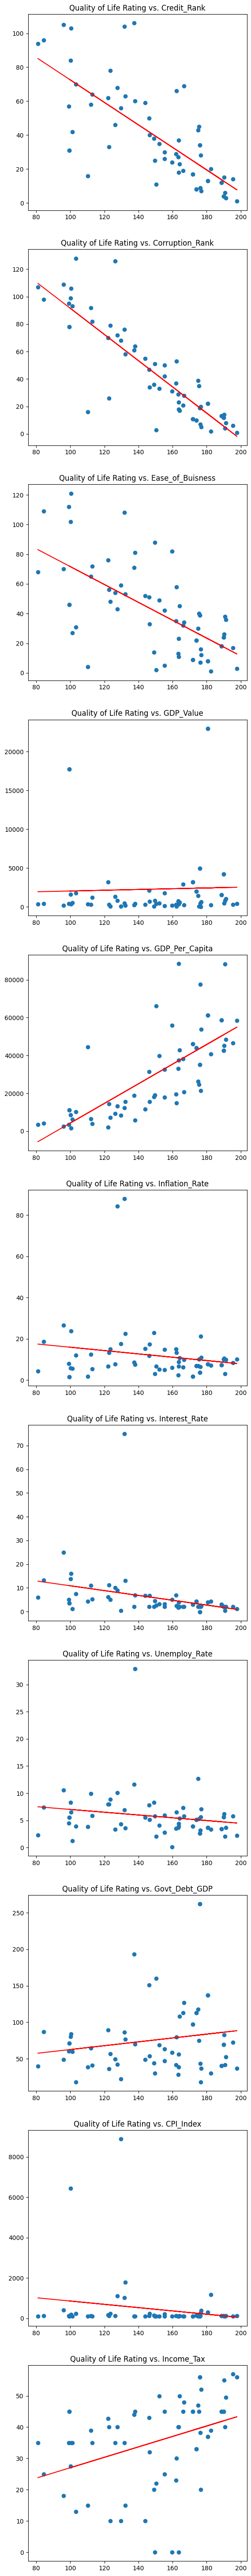

In [61]:
# There is a negative proportionality between Quality of Life Rating and Credit_Rank. This is expected, 
#   lower numbered rank means top credit rated countries and they have higher Quality of life rating.
# There is a negative proportionality between Quality of Life Rating and Corruption_Rank. 
#   This is expected, lower numbered rank means less corruption  and they have higher Quality of life rating.
# There is a negative proportionality between Quality of Life Rating and Ease_of_Buisness
# There is a slightly positive proportionality between Quality of Life Rating and GDP_Value
# There is a positive proportionality between Quality of Life Rating and GDP_Per_Capita
# There is a slightly negative proportionality between Quality of Life Rating and Inflation_Rate
# There is a slightly negative proportionality between Quality of Life Rating and Interest_Rate
# There is a slightly negative proportionality between Quality of Life Rating and Unemployment_Rate
# There is a positive proportionality between Quality of Life Rating and Govt_Debt_GDP
# There is a slightly negative proportionality between Quality of Life Rating and CPI_Index
# There is a positive proportionality between Quality of Life Rating and Income_Tax


figure, axis = plt.subplots(11)
figure.set_figheight(75)
cols = df_float.columns.tolist()
for i in range(0, 11):
    axis[i].scatter(quality_of_life_rating, df_float[cols[i]])
    axis[i].set_title(f"Quality of Life Rating vs. {cols[i]}")
    m, b = np.polyfit(quality_of_life_rating, df_float[cols[i]], 1)
    axis[i].plot(quality_of_life_rating, m*quality_of_life_rating + b, color='red')

In [62]:
world_life_quality_df.drop(['quality_of_life_rank'], axis = 1, inplace = True)

# Data Modelling

In [63]:
df_preprocess = world_life_quality_df.copy()

In [64]:
df_preprocess.head()

,Country_Name,Credit_Rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
0,United States,13.0,22.0,8.0,22996.0,61280.0,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,United Kingdom,17.0,11.0,9.0,3187.0,46209.0,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,Germany,4.0,12.0,24.0,4223.0,42527.0,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,Japan,34.0,19.0,39.0,4937.0,35278.0,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,Canada,8.0,10.0,22.0,1991.0,43946.0,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [65]:
df_preprocess.describe()

,Credit_Rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,39.375000,43.812500,41.515625,2286.319844,30230.250000,11.869219,5.800313,5.724687,75.781875,452.031250,35.356719,150.017188
std,29.095082,35.082612,30.131981,4903.968864,22320.280602,14.645630,9.806671,4.259943,49.497288,1355.183754,14.486331,32.189833
min,1.000000,1.000000,1.000000,36.260000,1507.000000,1.600000,-0.100000,0.100000,18.100000,101.000000,0.000000,81.090000
25%,15.750000,13.750000,17.750000,310.250000,11188.000000,5.997500,2.000000,3.630000,41.775000,108.875000,26.875000,125.685000
50%,32.000000,33.500000,37.000000,502.500000,25471.500000,7.900000,3.250000,5.200000,63.800000,121.500000,39.000000,157.500000
75%,59.250000,70.500000,56.500000,1781.750000,44674.750000,12.697500,6.062500,6.600000,87.715000,181.750000,45.000000,176.040000
max,106.000000,128.000000,121.000000,22996.000000,88588.000000,88.000000,75.000000,32.900000,262.000000,8885.000000,56.950000,197.750000


In [66]:
pd.set_option('display.max_columns', None)

In [67]:
df_preprocess.head()

,Country_Name,Credit_Rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
0,United States,13.0,22.0,8.0,22996.0,61280.0,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,United Kingdom,17.0,11.0,9.0,3187.0,46209.0,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,Germany,4.0,12.0,24.0,4223.0,42527.0,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,Japan,34.0,19.0,39.0,4937.0,35278.0,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,Canada,8.0,10.0,22.0,1991.0,43946.0,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [68]:
df_preprocess_sub = df_preprocess.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]

In [69]:
df_preprocess_sub.head()

,Credit_Rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax,Quality_of_Life_Rating
0,13.0,22.0,8.0,22996.0,61280.0,7.7,4.00,3.7,137.0,298.0,37.00,180.56
1,17.0,11.0,9.0,3187.0,46209.0,1.7,3.00,3.9,97.4,108.5,45.00,171.89
2,4.0,12.0,24.0,4223.0,42527.0,10.0,2.00,5.6,69.3,122.0,45.00,190.04
3,34.0,19.0,39.0,4937.0,35278.0,3.7,-0.10,2.6,262.0,104.0,55.97,176.04
4,8.0,10.0,22.0,1991.0,43946.0,6.9,4.25,5.1,113.0,154.0,33.00,173.90


In [70]:
X = df_preprocess_sub.iloc[:, [0]+list(range(1, 11))]

In [71]:
X.head()

,Credit_Rank,Corruption_Rank,Ease_of_Buisness,GDP_Value,GDP_Per_Capita,Inflation_Rate,Interest_Rate,Unemploy_Rate,Govt_Debt_GDP,CPI_Index,Income_Tax
0,13.0,22.0,8.0,22996.0,61280.0,7.7,4.00,3.7,137.0,298.0,37.00
1,17.0,11.0,9.0,3187.0,46209.0,1.7,3.00,3.9,97.4,108.5,45.00
2,4.0,12.0,24.0,4223.0,42527.0,10.0,2.00,5.6,69.3,122.0,45.00
3,34.0,19.0,39.0,4937.0,35278.0,3.7,-0.10,2.6,262.0,104.0,55.97
4,8.0,10.0,22.0,1991.0,43946.0,6.9,4.25,5.1,113.0,154.0,33.00


In [72]:
y= df_preprocess_sub['Quality_of_Life_Rating']
# X corresponds to rows containing all values but values for Quality_of_Life_Rating

In [73]:
y.head()
# Y corresponds to all rows of the dataframe that only contain values for Quality_of_life_Rating 

0    180.56
1    171.89
2    190.04
3    176.04
4    173.90
Name: Quality_of_Life_Rating, dtype: float64

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, :], y)
y_pred = model.predict(X.iloc[:, :])
print("Mean Squared Error:", mean_squared_error(y, y_pred))
# Mean squared error has to do with the sum of the squares of differences of the observed values and the predicted values
# of various datapoints divided by the number data points that there are 

Mean Squared Error: 209.87288200424427


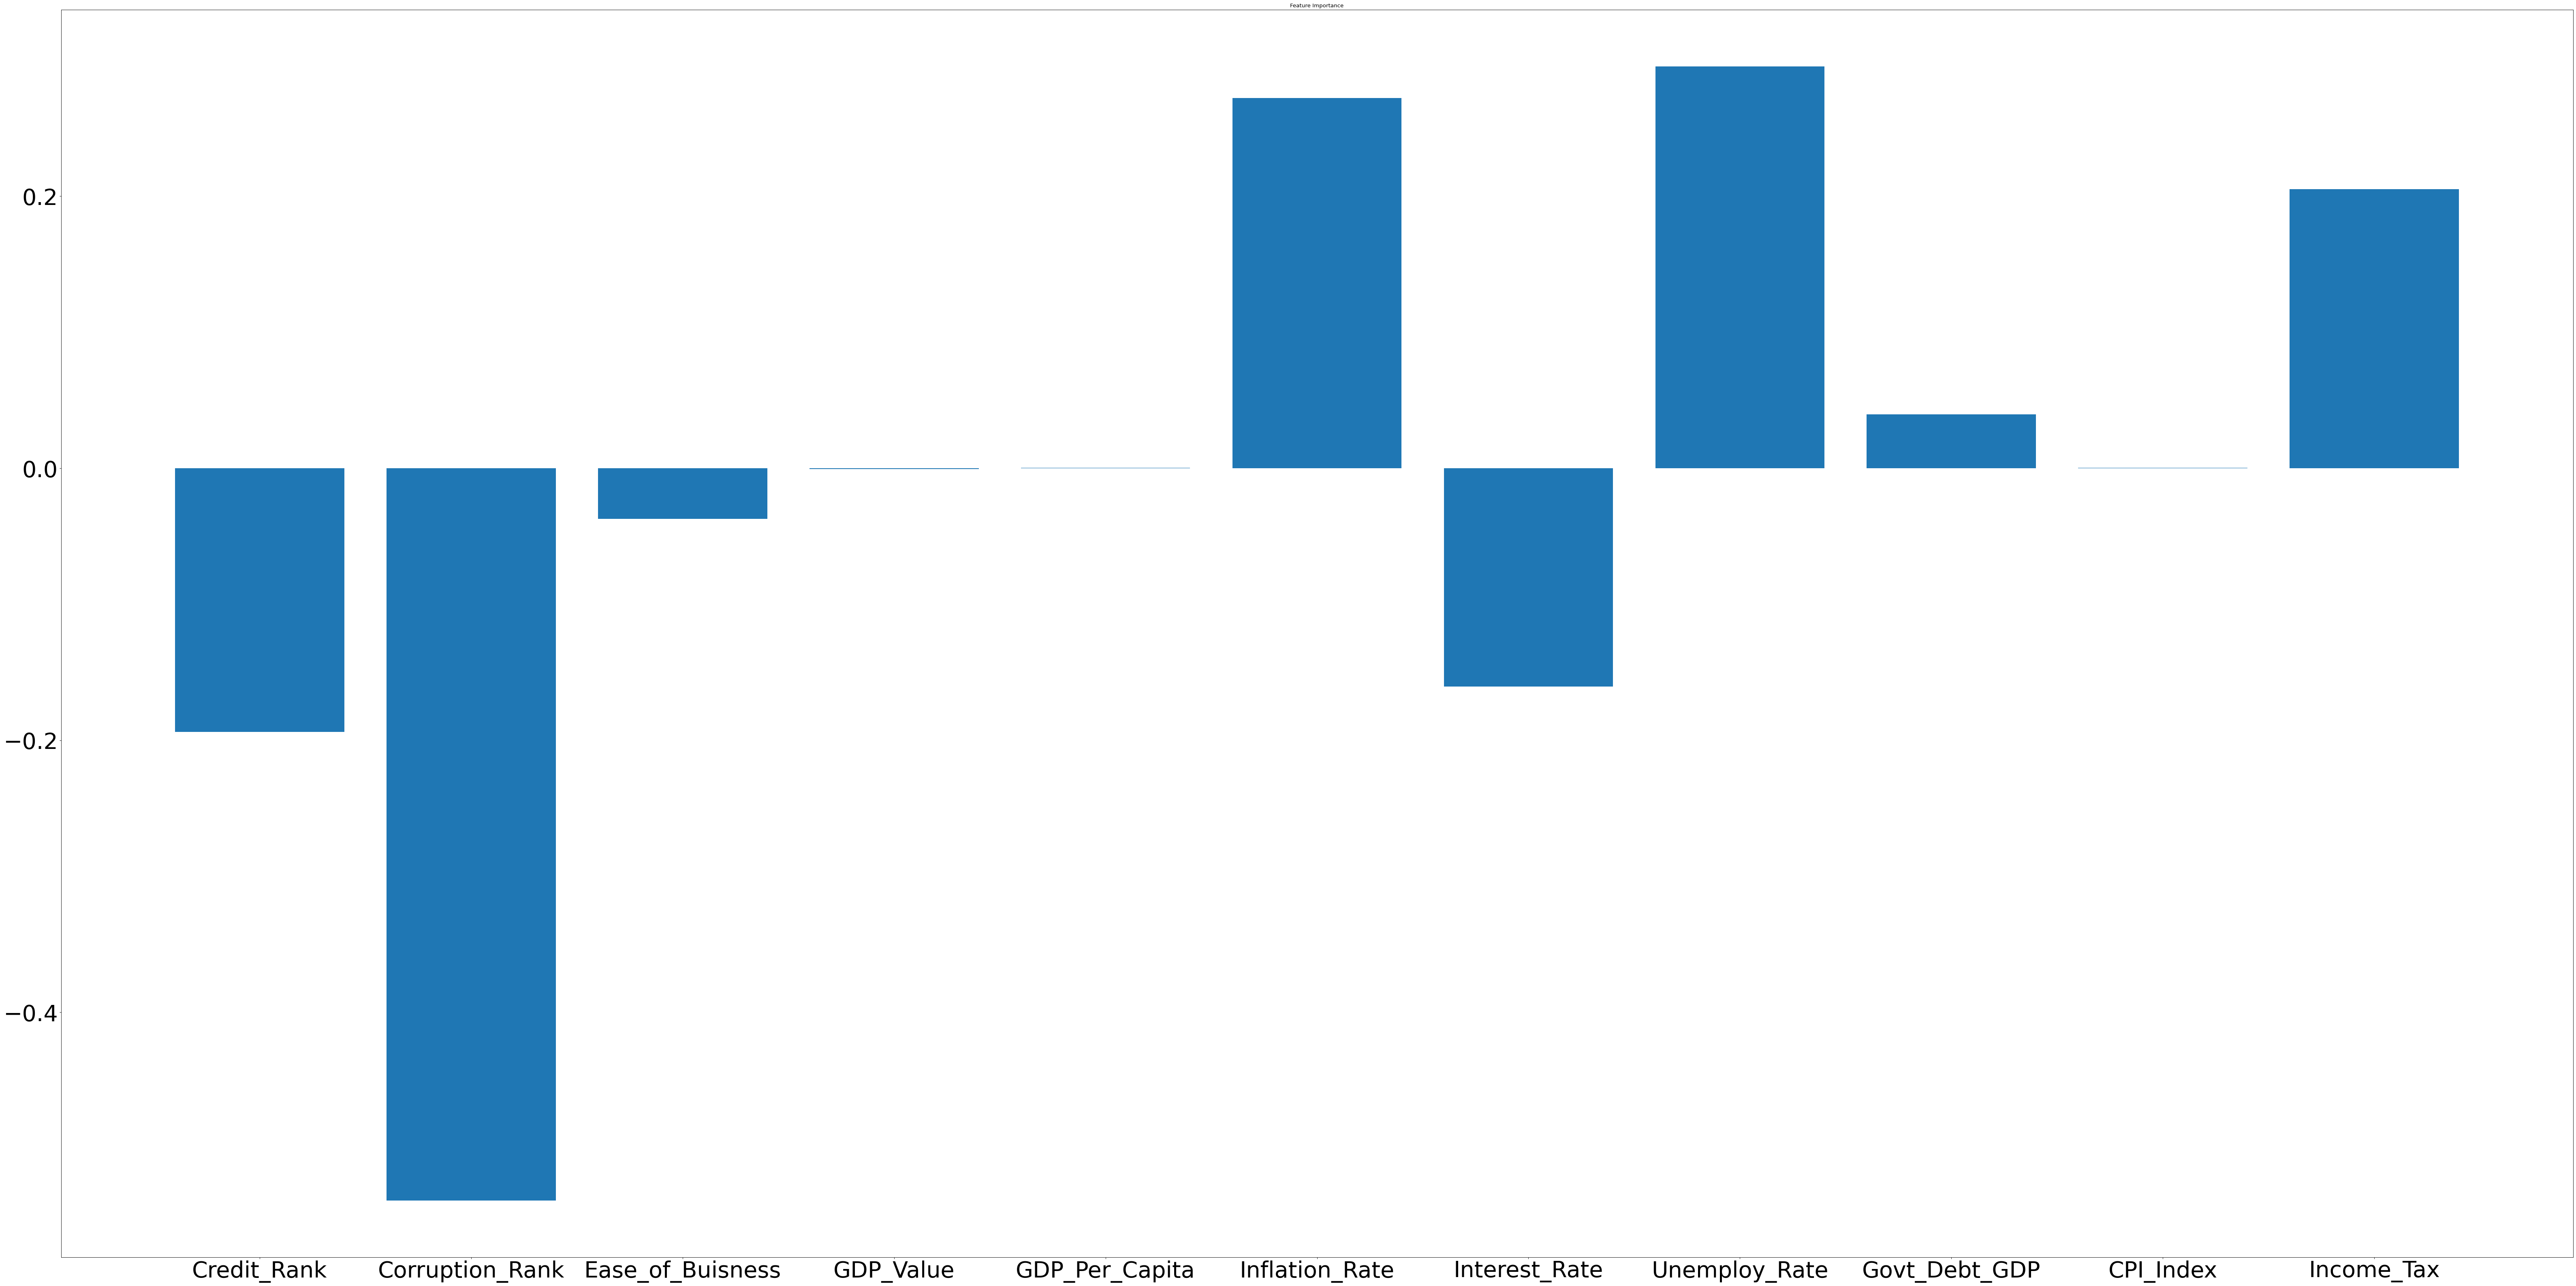

In [75]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance = model.coef_
feature_names = X.iloc[:, :].columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()
# The graph below shows the factors that are correlated to Quality of life rating of a country.

In [76]:
temp = {"feature":cols, "feature_importance":feature_importance.ravel()}
pd.DataFrame(temp)
# The table below is a numerical representation of the above

,feature,feature_importance
0,Credit_Rank,-0.193960
1,Corruption_Rank,-0.538387
2,Ease_of_Buisness,-0.037123
3,GDP_Value,-0.000457
4,GDP_Per_Capita,0.000197
5,Inflation_Rate,0.272058
6,Interest_Rate,-0.160474
7,Unemploy_Rate,0.295290
8,Govt_Debt_GDP,0.039712
9,CPI_Index,0.000306


In [77]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, :], y)
y_pred = regressor.predict(X.iloc[:, :])

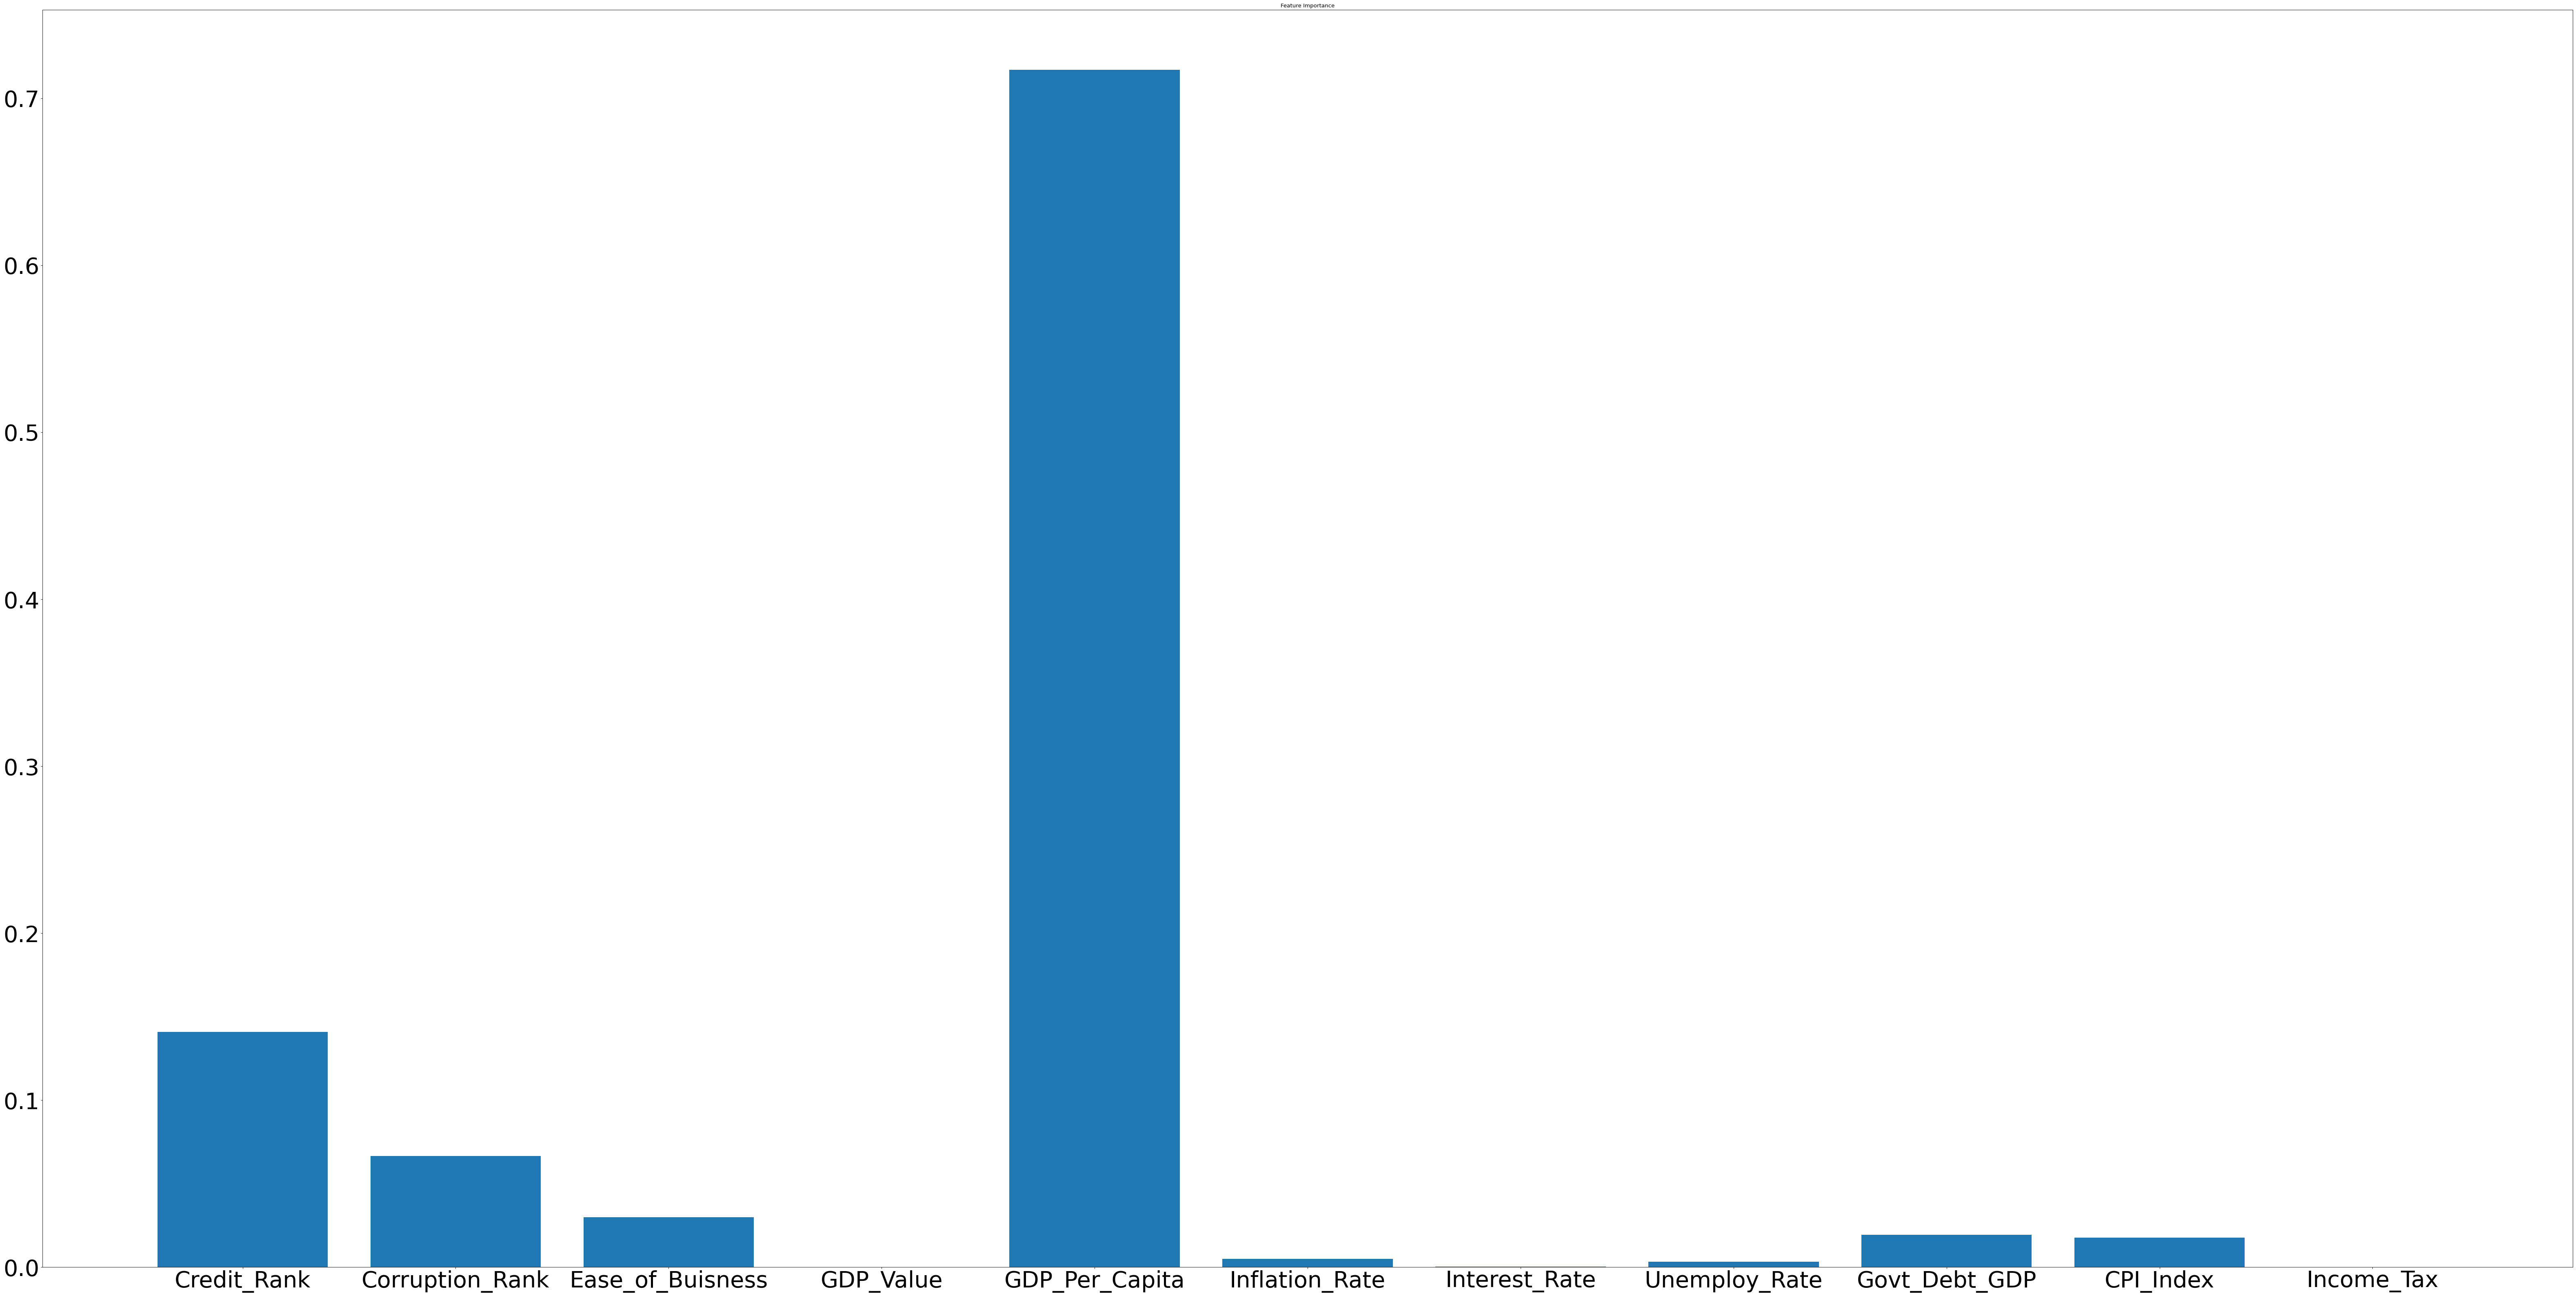

In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, :].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()
# As we can see below, GDP_Per_Capita is the most correlated to the Quality_of_Life_Ranking

In [79]:
temp = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,Credit_Rank,0.140870
1,Corruption_Rank,0.066661
2,Ease_of_Buisness,0.029810
3,GDP_Value,0.000000
4,GDP_Per_Capita,0.717034
5,Inflation_Rate,0.004974
6,Interest_Rate,0.000377
7,Unemploy_Rate,0.003332
8,Govt_Debt_GDP,0.019287
9,CPI_Index,0.017556


# Summary

The above shows the important economic indicators that affect the quality of life in a country. As we can see in the above chart and table, the GDP Per Capita of a country affects the most followed by Credit Rank of a country, Corruption level in a country, The country's governtment debt to the GDP ratio and CPI index etc. This is in line with what we would expect to see, the GDP Per Capita reflects prosperity of a nation. Next the Credit Rating reflects the economic health of a country. Corruption level comes next followed by a nation's Government Debt and the Consumer Price Index (CPI) etc.